In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [5]:
from llm_toolkit.logical_reasoning_utils import *

loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py


In [6]:
model_name = "Mistral-7B-v0.3-Chinese-Chat"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [7]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                                                                     Non-Null Count  Dtype 
---  ------                                                                     --------------  ----- 
 0   text                                                                       3000 non-null   object
 1   label                                                                      3000 non-null   object
 2   title                                                                      3000 non-null   object
 3   puzzle                                                                     3000 non-null   object
 4   truth                                                                      3000 non-null   object
 5   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat_torch.float16_lf                 3000 non-null   object
 6   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-35_torch.fl

In [8]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat_torch.float16_lf',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-35_torch.float16_lf',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-70_torch.float16_lf',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-105_torch.float16_lf',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-140_torch.float16_lf',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-175_torch.float16_lf',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-210_torch.float16_lf',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-245_torch.float16_lf',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-280_torch.float16_lf',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-315_torch.float16_lf',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-350_torch.float16_lf']

In [9]:
perf_df = get_metrics_df(df)
perf_df

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:359: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


epoch                                              model  accuracy  \
0     0.0  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat_torc...  0.711333   
1     0.2  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.702000   
2     0.4  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.742000   
3     0.6  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.659667   
4     0.8  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.714667   
5     1.0  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.732667   
6     1.2  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.701667   
7     1.4  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.750000   
8     1.6  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.715667   
9     1.8  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.691667   
10    2.0  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.697667   

    precision    recall        f1  ratio_valid_classifications  
0    0.702205  0.711333  0.689497                        0.004  
1    0.793273  0.702000  0.734271                        1.000  
2    0.789829  0.742000  0.753668                        1.000  
3    0.792340  0.659667  0.706754                        1.000  
4    0.786134  0.714667  0.740468                        1.000  
5    0.787687  0.732667  0.747187                        1.000  
6    0.790312  0.701667  0.734871                        1.000  
7    0.788587  0.750000  0.764823                        1.000  
8    0.784611  0.715667  0.741004                        1.000  
9    0.786426  0.691667  0.725750                        1.000  
10   0.788944  0.697667  0.730800                        1.000

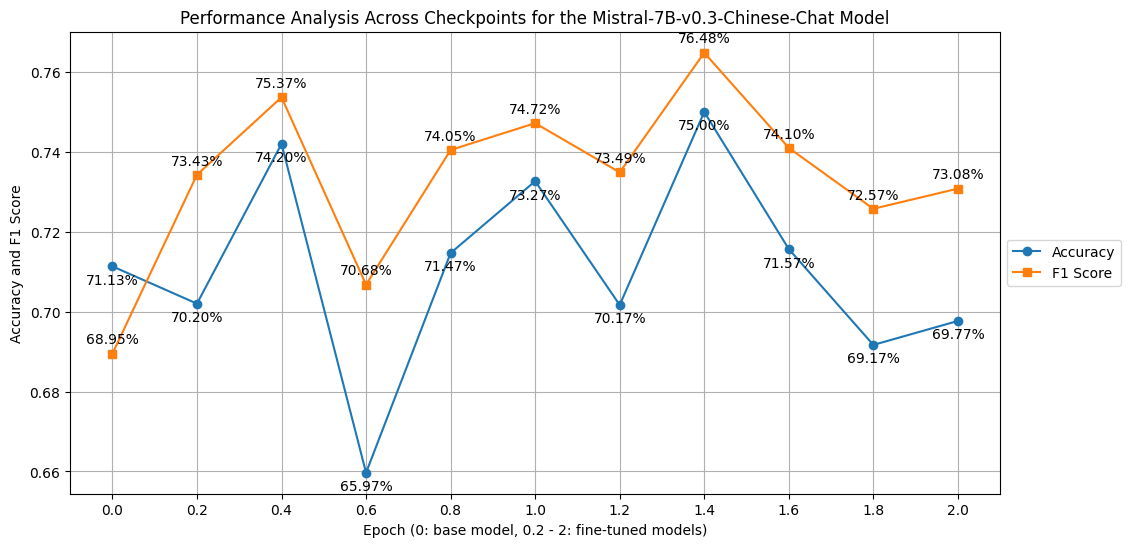

In [10]:
plot_metrics(perf_df, model_name)

In [11]:
perf_df.to_csv(metrics_csv, index=False)

In [12]:
extract_answer("不是。", debug=True)

--------
step 1: 不是。
--------
step 2: 不是。
--------
step 3: 不是。
--------
step 4: 不是
--------
step 5: 不是


'不是'

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat_torch.float16_lf
不是。            2011
是。              903
不重要。             69
不重要               9
问法错误              3
问法错误。             3
不是。甄郝死于湖边，而       1
回答正确。             1
Name: count, dtype: int64


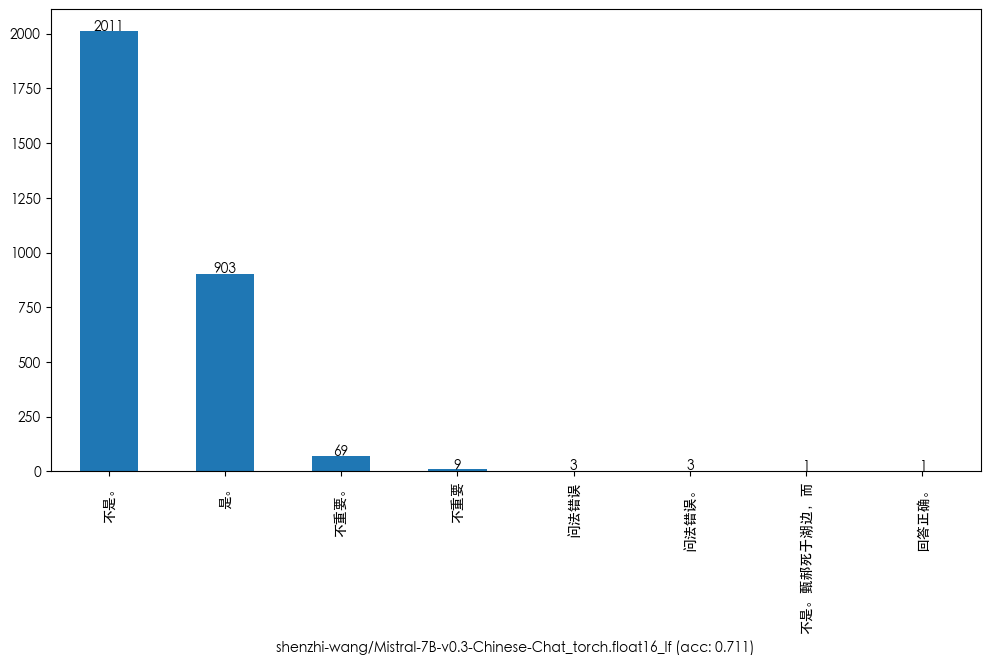

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-35_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-35_torch.float16_lf
不是      1412
是        975
不重要      558
回答正确      39
问法错误      16
Name: count, dtype: int64


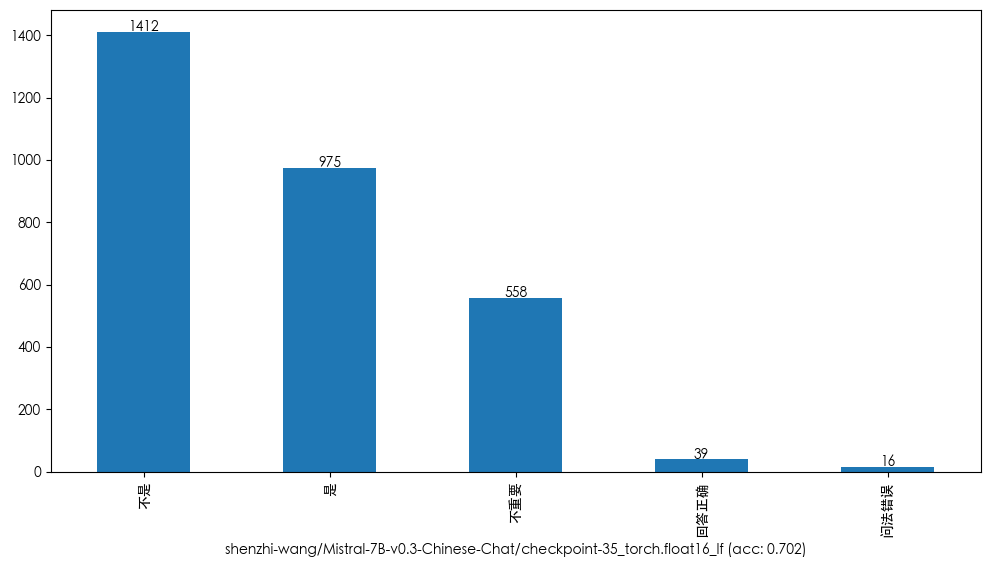

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-70_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-70_torch.float16_lf
不是      1555
是       1065
不重要      351
回答正确      27
问法错误       2
Name: count, dtype: int64


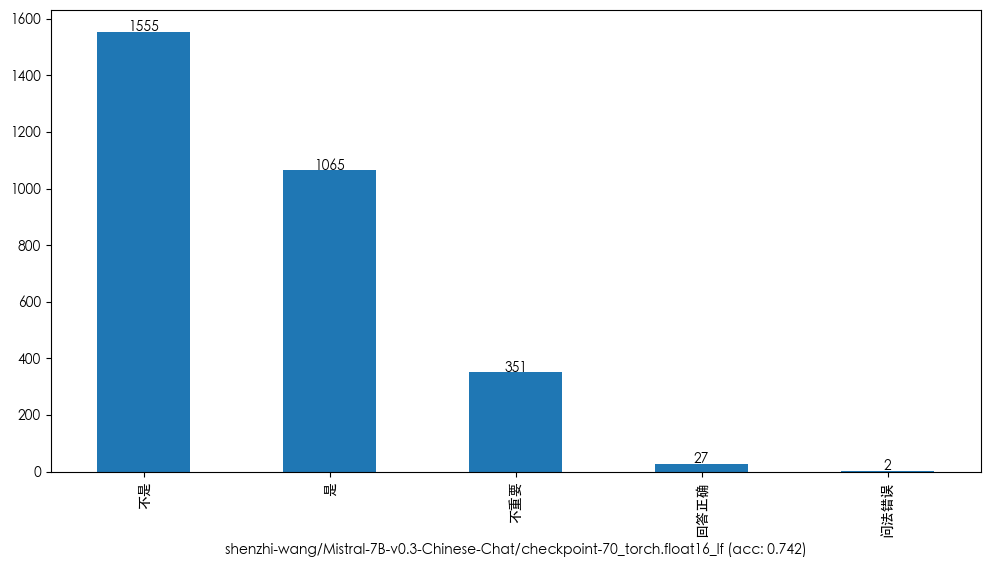

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-105_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-105_torch.float16_lf
不是      1177
是       1034
不重要      734
回答正确      36
问法错误      19
Name: count, dtype: int64


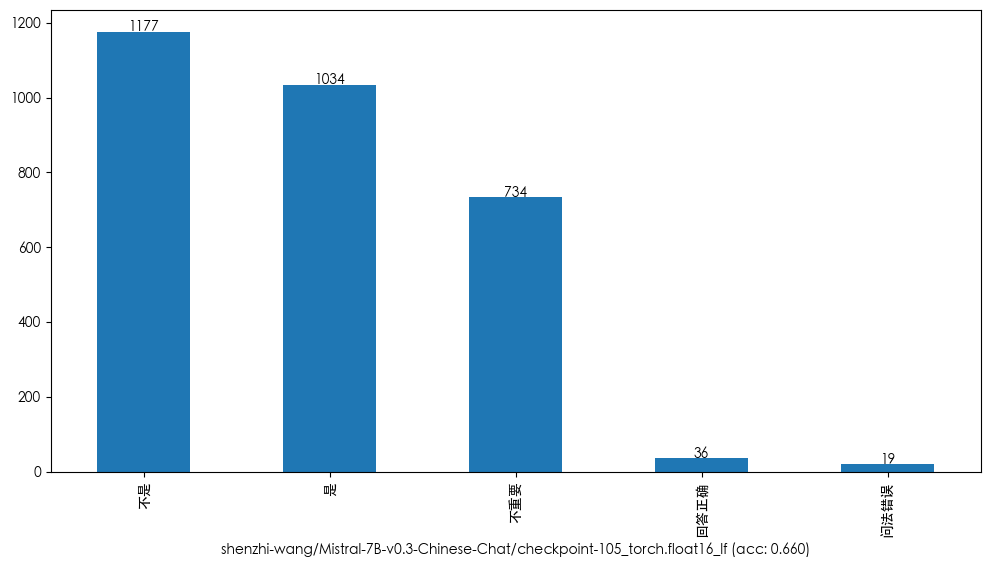

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-140_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-140_torch.float16_lf
不是      1483
是        975
不重要      459
问法错误      42
回答正确      41
Name: count, dtype: int64


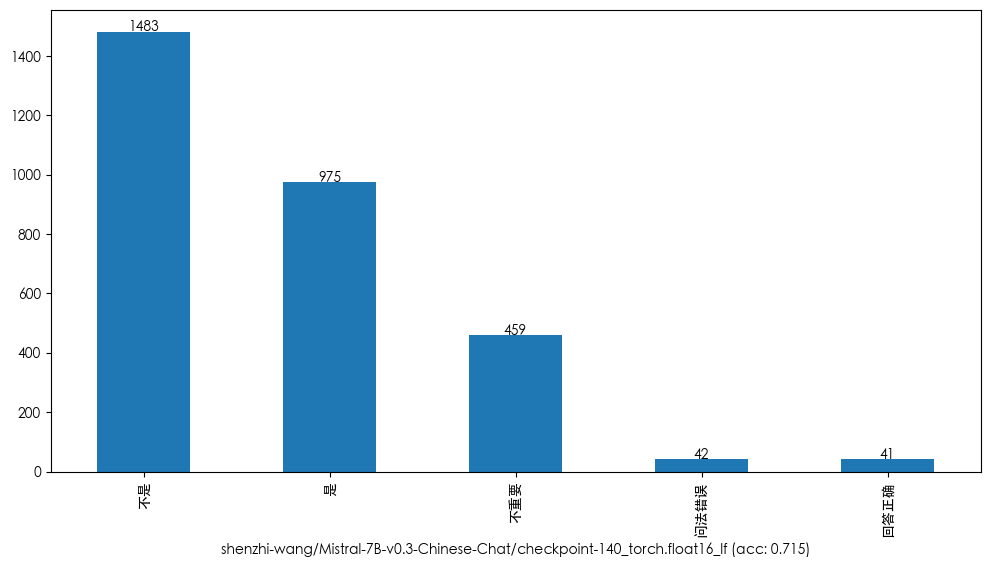

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-175_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-175_torch.float16_lf
不是      1646
是        917
不重要      386
回答正确      36
问法错误      15
Name: count, dtype: int64


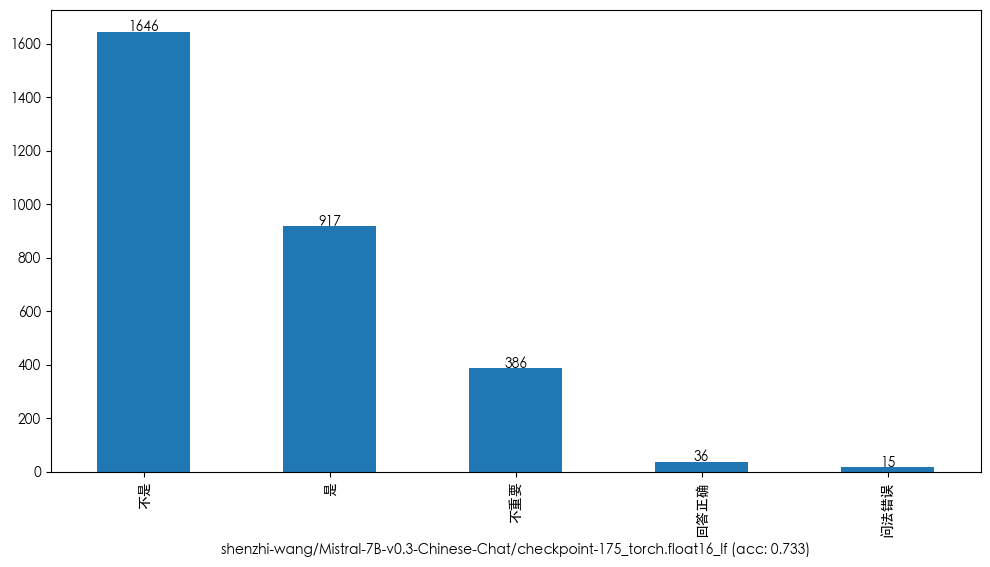

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-210_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-210_torch.float16_lf
不是      1374
是       1017
不重要      545
回答正确      34
问法错误      30
Name: count, dtype: int64


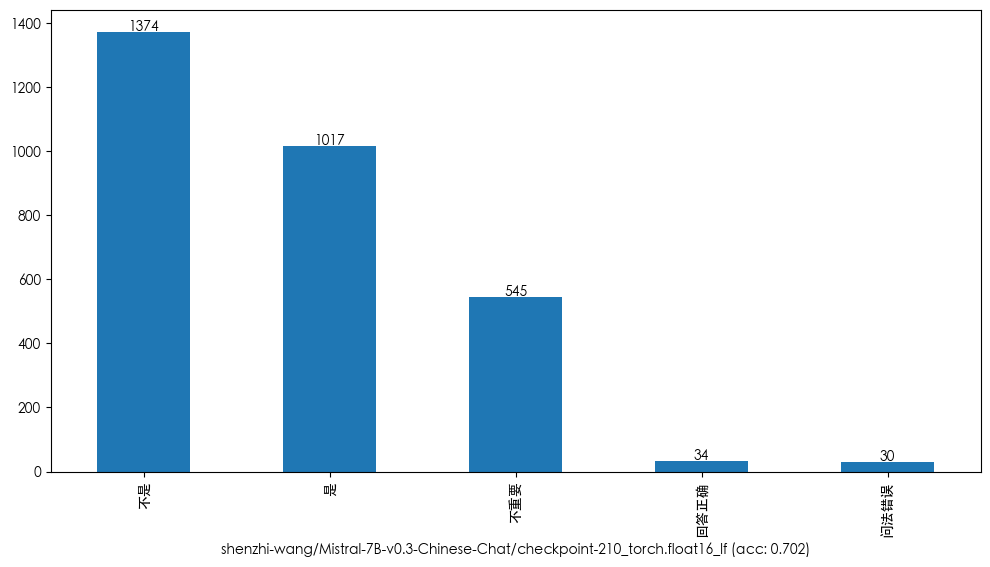

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-245_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-245_torch.float16_lf
不是      1490
是       1104
不重要      339
回答正确      34
问法错误      33
Name: count, dtype: int64


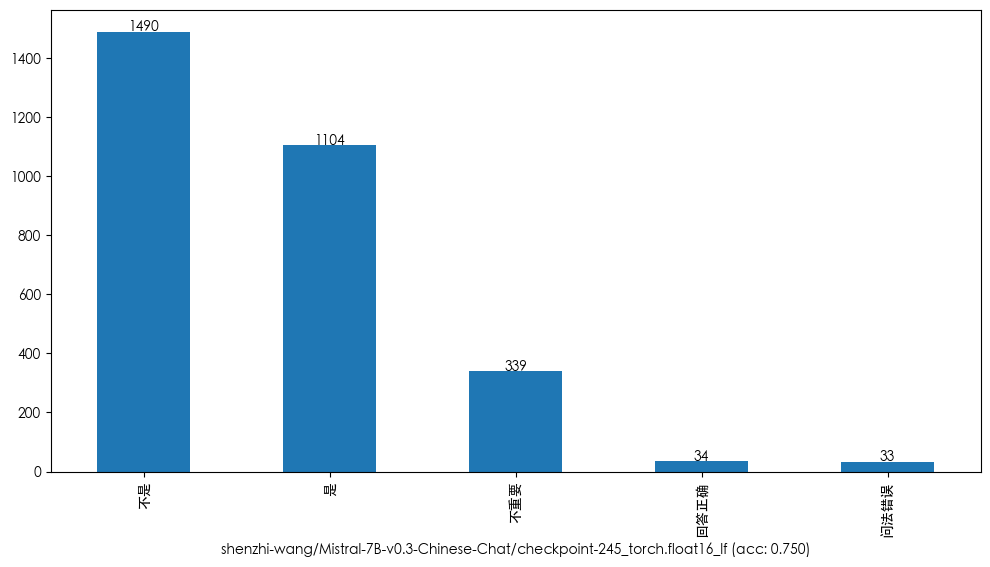

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-280_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-280_torch.float16_lf
不是      1461
是       1017
不重要      465
回答正确      29
问法错误      28
Name: count, dtype: int64


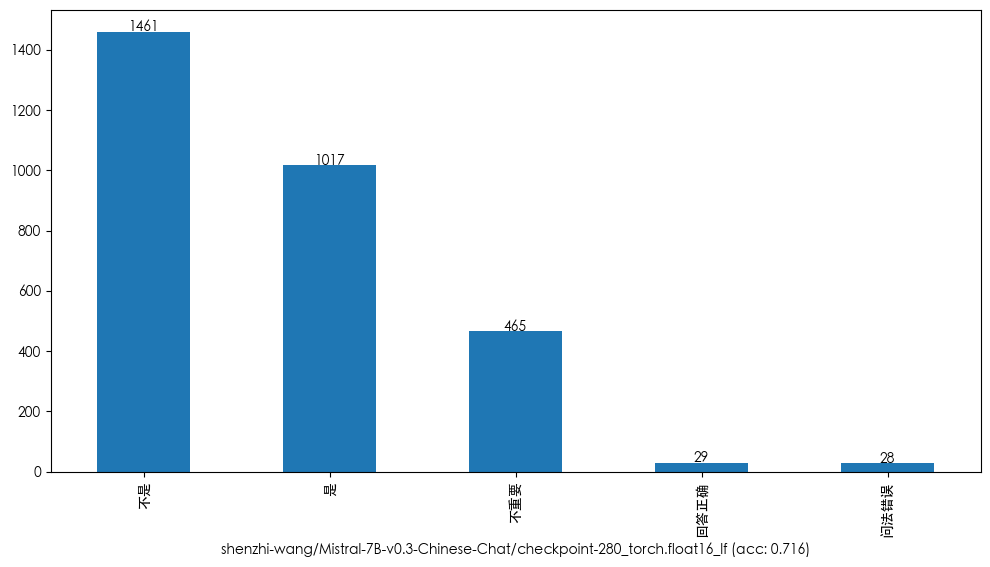

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-315_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-315_torch.float16_lf
不是      1406
是        961
不重要      569
回答正确      34
问法错误      30
Name: count, dtype: int64


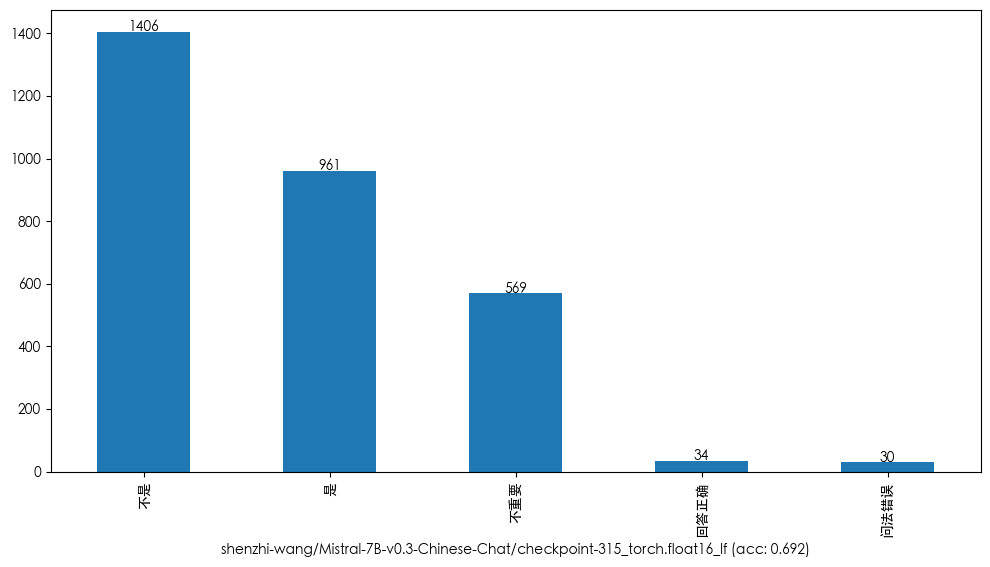

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-350_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-350_torch.float16_lf
不是      1398
是        980
不重要      556
回答正确      35
问法错误      31
Name: count, dtype: int64


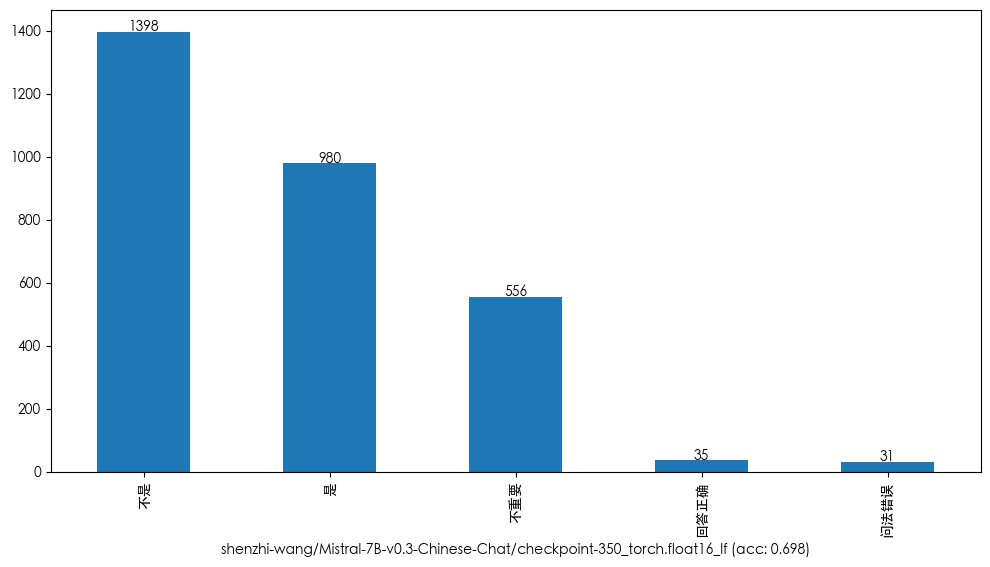

In [13]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (acc: {accuracy:.3f})")

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat_torch.float16_lf
不是。            2011
是。              903
不重要。             69
不重要               9
问法错误              3
问法错误。             3
不是。甄郝死于湖边，而       1
回答正确。             1
Name: count, dtype: int64


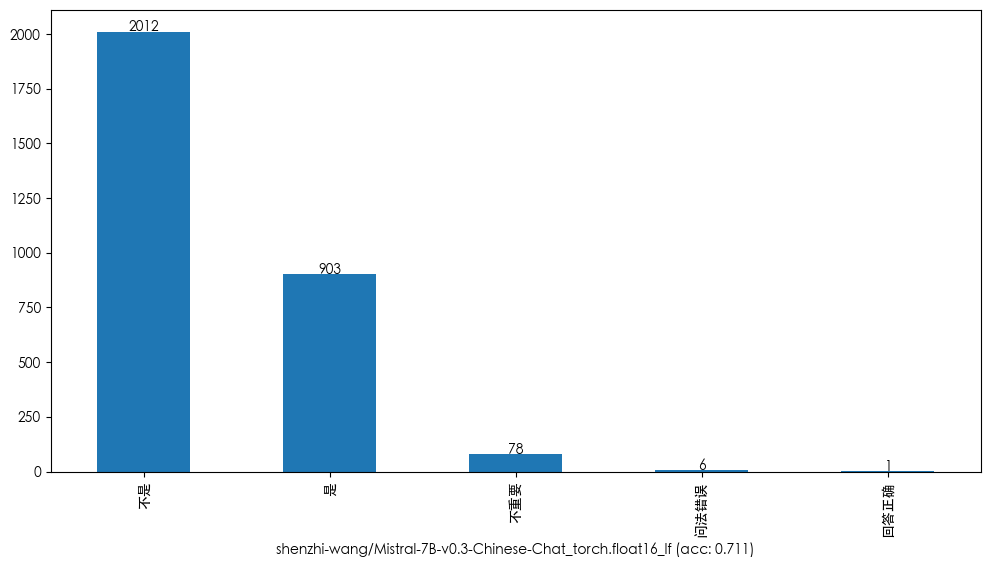

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-35_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-35_torch.float16_lf
不是      1412
是        975
不重要      558
回答正确      39
问法错误      16
Name: count, dtype: int64


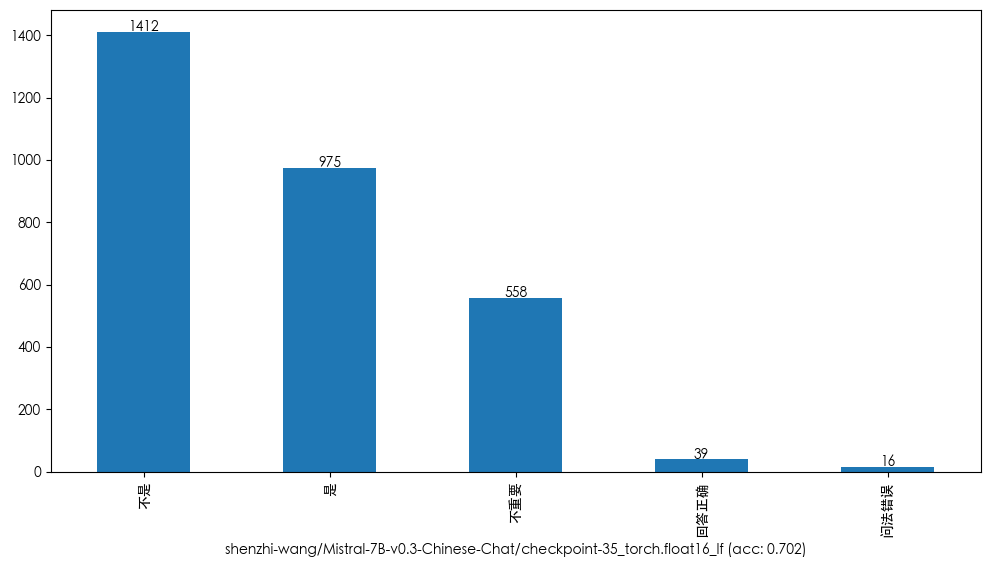

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-70_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-70_torch.float16_lf
不是      1555
是       1065
不重要      351
回答正确      27
问法错误       2
Name: count, dtype: int64


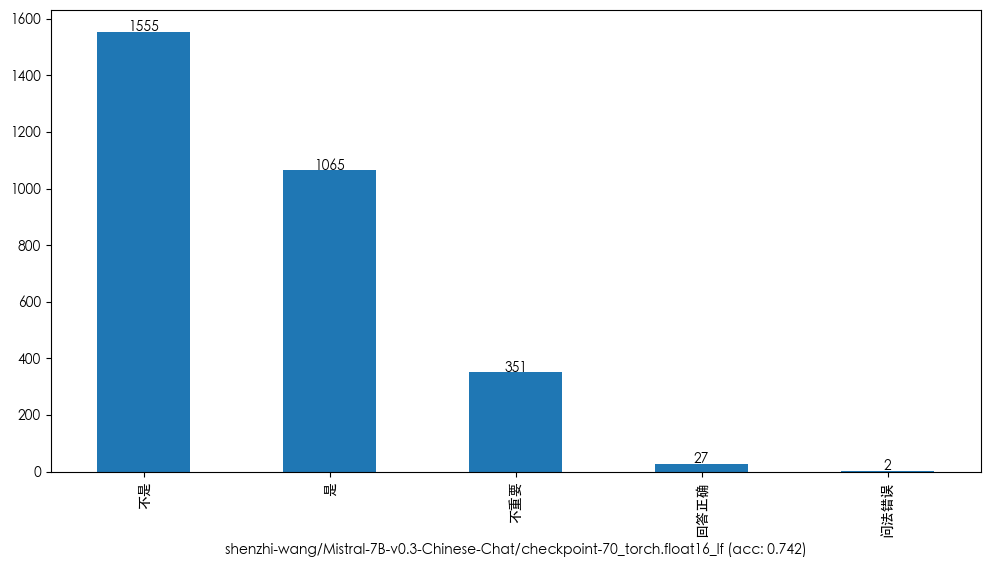

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-105_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-105_torch.float16_lf
不是      1177
是       1034
不重要      734
回答正确      36
问法错误      19
Name: count, dtype: int64


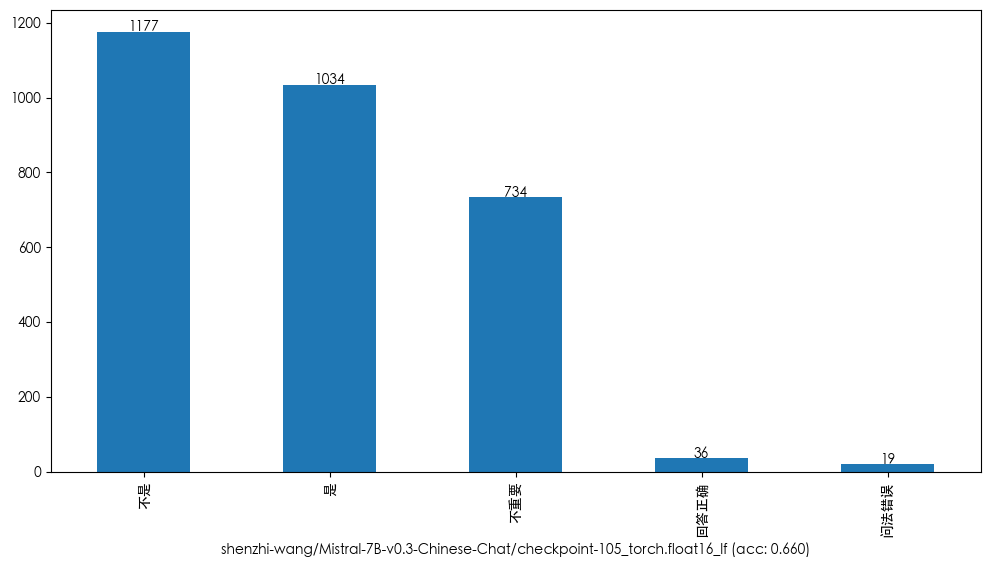

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-140_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-140_torch.float16_lf
不是      1483
是        975
不重要      459
问法错误      42
回答正确      41
Name: count, dtype: int64


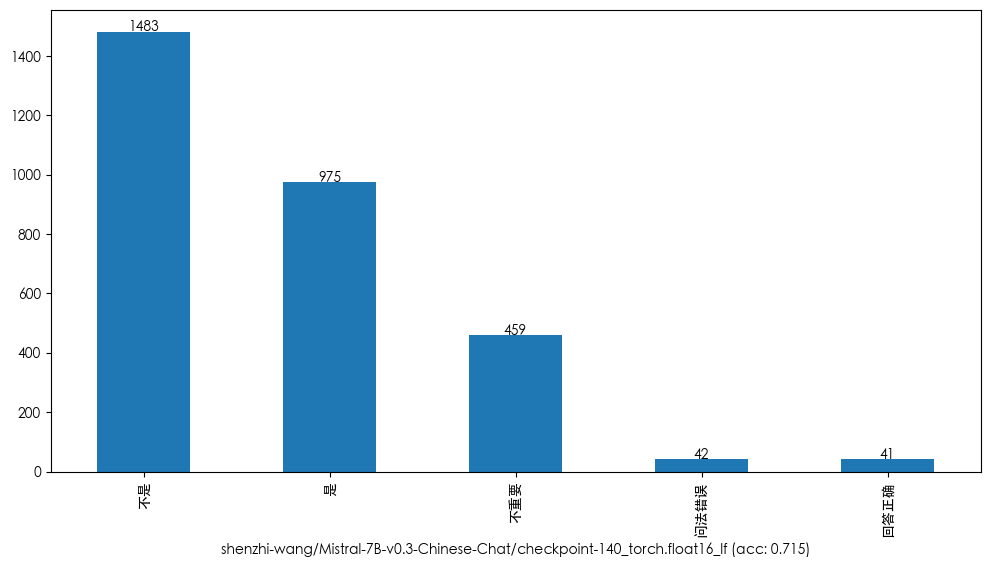

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-175_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-175_torch.float16_lf
不是      1646
是        917
不重要      386
回答正确      36
问法错误      15
Name: count, dtype: int64


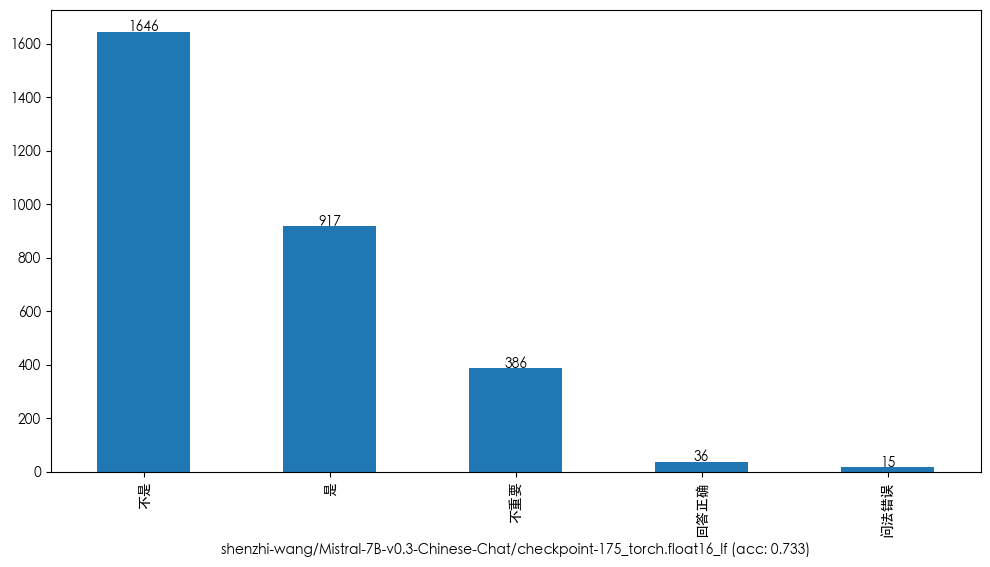

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-210_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-210_torch.float16_lf
不是      1374
是       1017
不重要      545
回答正确      34
问法错误      30
Name: count, dtype: int64


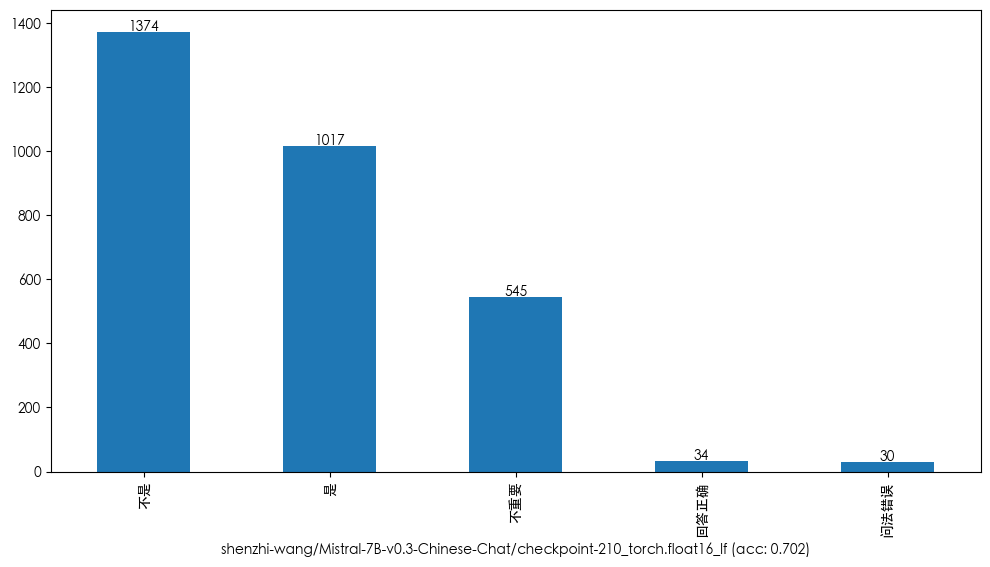

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-245_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-245_torch.float16_lf
不是      1490
是       1104
不重要      339
回答正确      34
问法错误      33
Name: count, dtype: int64


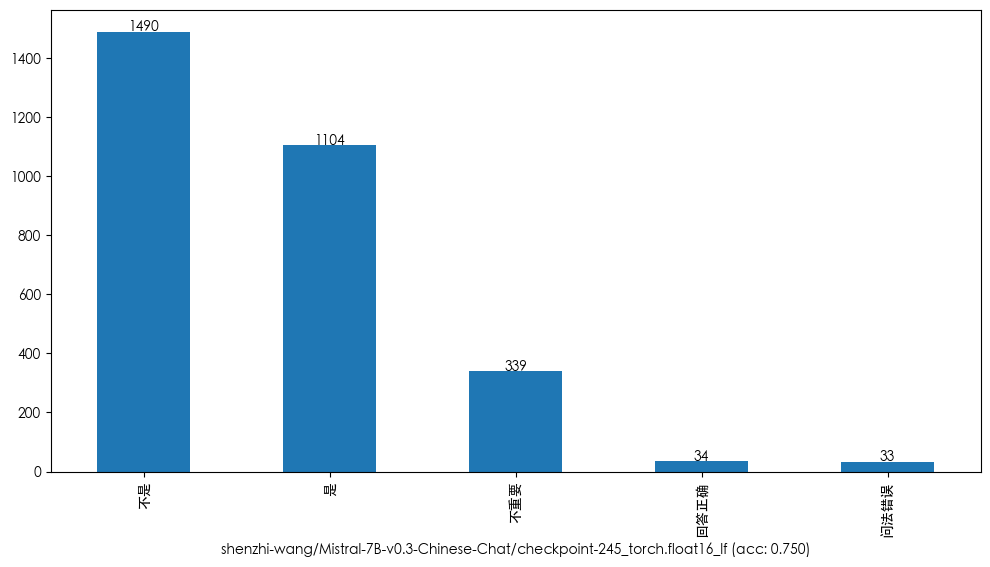

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-280_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-280_torch.float16_lf
不是      1461
是       1017
不重要      465
回答正确      29
问法错误      28
Name: count, dtype: int64


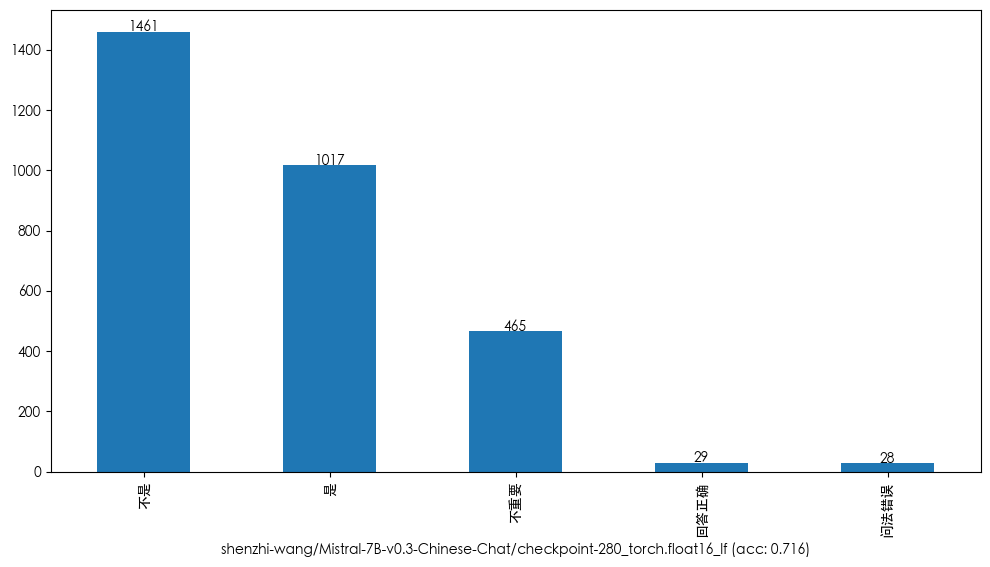

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-315_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-315_torch.float16_lf
不是      1406
是        961
不重要      569
回答正确      34
问法错误      30
Name: count, dtype: int64


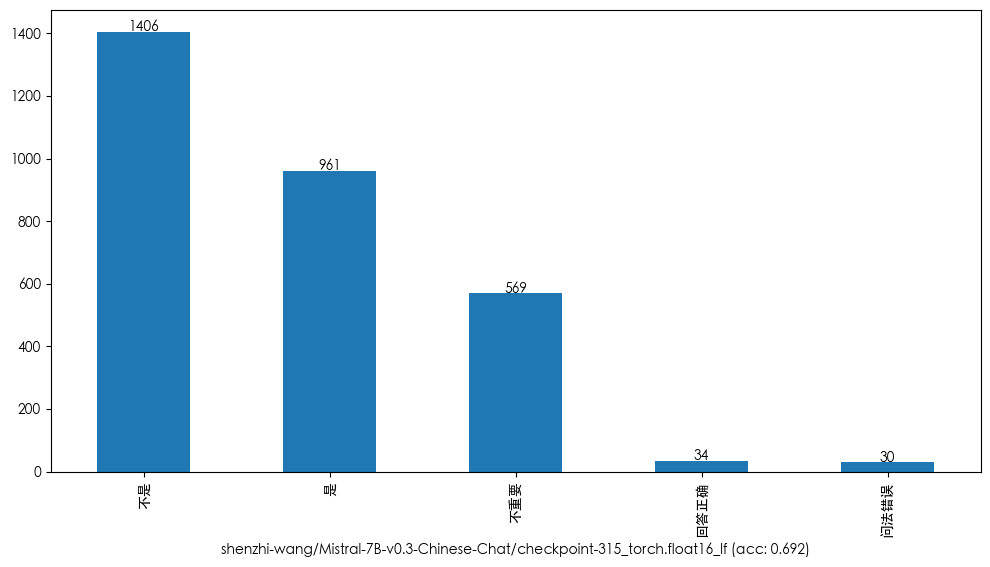

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-350_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-350_torch.float16_lf
不是      1398
是        980
不重要      556
回答正确      35
问法错误      31
Name: count, dtype: int64


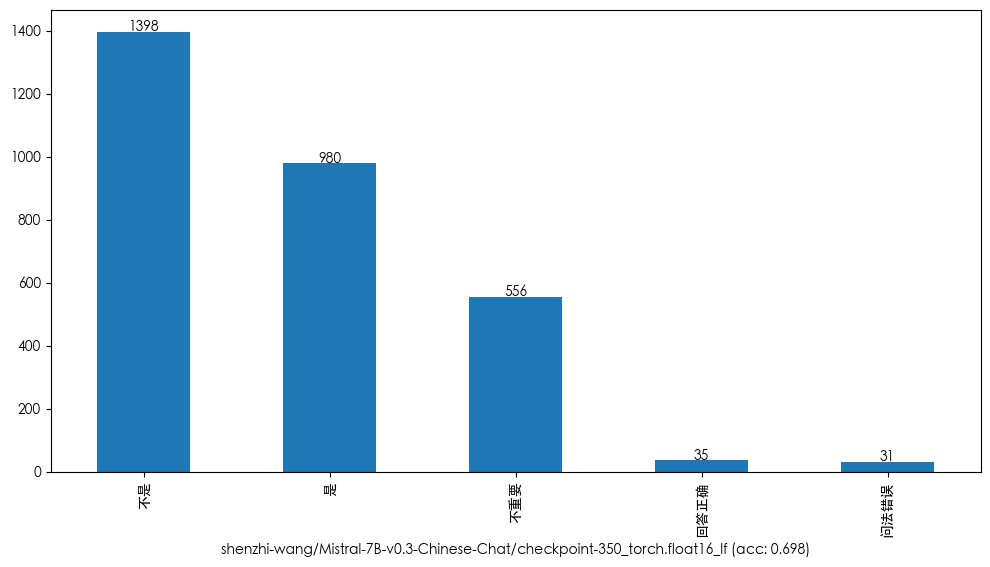

In [14]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (acc: {accuracy:.3f})", preprocess_func=extract_answer)